In [1]:
from qutip import tensor, jmat, qeye, fock_dm
import numpy as np
import matplotlib.pyplot as plt

from quaccatoo.pulsed_experiment import rabi, hahn
import quaccatoo.pulsed_logic as pulsed_logic

# <a id='toc1_'></a>[Rabi](#toc0_)

In [7]:
experiment = rabi(
    tarray = np.linspace(0, 1000, 1000),
    rho0 = fock_dm(2, 0),
    H0 = jmat(1/2, 'z'),
    H1 = [.02*jmat(1/2, 'x'), .02*jmat(1/2, 'y')],
    pulse_shape = [pulsed_logic.square_pulse, pulsed_logic.square_pulse],
    pulse_params = {'w_pulse': 1},
)

res = experiment.run(
    observable = [fock_dm(2, 0), fock_dm(2, 1)]
)

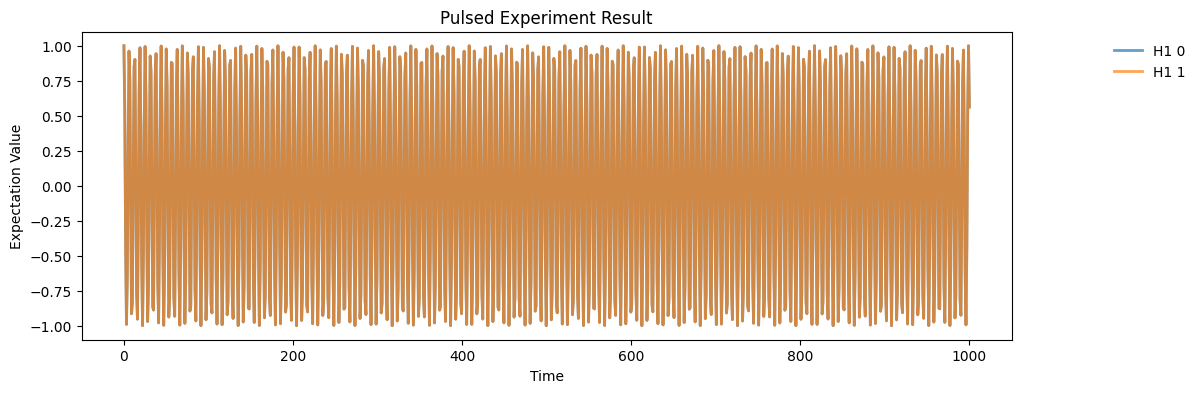

In [8]:
experiment.plot_pulses(figsize=(12, 4))

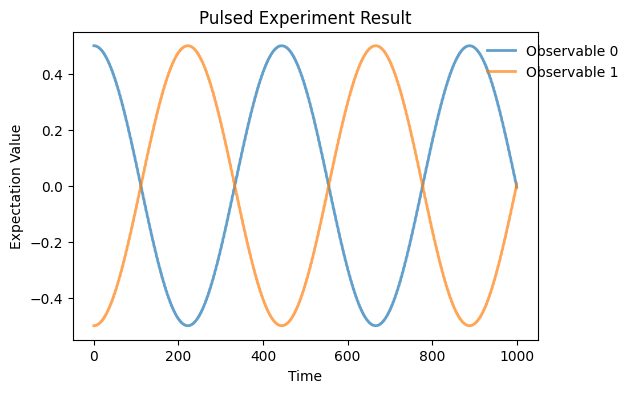

In [9]:
experiment.plot_result(figsize=(6, 4))

# Hahn

In [2]:
experiment = hahn(
    tarray = np.linspace(0, 1000, 1000),
    rho0 = fock_dm(2, 0),
    H0 = jmat(1/2, 'z'),
    H1 = .02*jmat(1/2, 'x'),
    pi_pulse_duration = 220,
    pulse_shape = pulsed_logic.square_pulse,
    pulse_params = {'w_pulse': 1},
)

res = experiment.run(
    observable = fock_dm(2, 0)
)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

TypeError: can't multiply sequence by non-int of type 'Qobj'